In [2]:
import time
from datetime import datetime

import pandas as pd
import numpy as np  
 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
   
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def load_datasets(feature_paths, label_paths):
    feature = np.ndarray(shape=(0,7))
    label = np.ndarray(shape=(0,1))
    df_l=None
    for file in feature_paths:
        df = pd.read_csv(file, delimiter=',', na_values='?')
        df_l = df.copy()
        print("df size",len(df.columns))
        # df = pd.read_csv(file, delimiter=',', na_values='?', header=None)
        # df['Time Occurred'] = pd.to_datetime(df['Date Occurred'],df['Time Occurred'])
        # print(df['Time Occurred'])
        # df['MO Codes']= df['MO Codes'].astype('category')
        df['Victim Sex']= df['Victim Sex'].astype('str')
        df['Victim Sex']= df['Victim Sex'].astype('category')
        print(df['Victim Sex'])
        df.info()
        # df.drop([ 'Area ID','Area Name','Date Reported','Date Occurred', 'Crime Code Description',
        df.drop([ 'Area ID','Area Name','Date Reported','Date Occurred', 'Time Occurred','Crime Code Description',
                # 'MO Codes','Victim Descent','Premise Description','Address','Cross Street'], 
                'MO Codes','Victim Descent','Premise Description','Address','Cross Street','Victim Sex'], 
                 axis=1,inplace=True)
        print('f df len',len(df))
        # print("df size",len(df.columns))
        # df.dropna(inplace=True, how='all')
        # feature = np.concatenate((feature, df))

        imp = SimpleImputer(missing_values=np.nan,fill_value=0)
        # imp = SimpleImputer(missing_values='NaN',fill_value=0)
        imp.fit(df)
        df = imp.transform(df)
        feature = np.concatenate((feature, df))

    df2=df_l.take([4], axis=1)
        # df2=df.take([4], axis=1)
        # print(type(df))
        # print("df2 size",len(df.columns))
        # print(df)
        # print(type(df2))
        # df2.drop(axis=0, index=0, columns=None, inplace=False)
    print('l df len',len(df2))
        # print("df2 size",len(df2.columns))
        # print(df2)
    label = np.concatenate((label, df2))

    label = np.ravel(label)
    return feature, label
 
def main():
    ISOTIMEFORMAT='%Y-%m-%d %X'
    print(time.strftime(ISOTIMEFORMAT,time.localtime(time.time()))) #add by me
    ''' 数据路径 '''
    trainfilePaths = ['Traffic_Collision_Data_from_2010_to_Today.csv']
    testfilePaths = ['Traffic_Collision_Data_from_2010_to_Today.csv']
    ''' 读入数据  '''
    x,y = load_datasets(trainfilePaths,testfilePaths)
    # return
    x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0,stratify=y)
    print('Start DT training')
    dt = DecisionTreeClassifier(max_depth=7).fit(x_train, y_train)
    # dt = DecisionTreeClassifier(max_depth=4).fit(x_train, y_train)
    print('Training done')

    answer_dt = dt.predict(x_test)
    print(len(answer_dt))
    np.savetxt('module.txt',answer_dt,fmt='%d', delimiter=',')
    print('Prediction done')

    print('\n\nThe classification report for DT:')
    print(classification_report(y_test, answer_dt))
    print(time.strftime(ISOTIMEFORMAT,time.localtime(time.time()))) #add by me

    # 数据可视化
    plt.figure(figsize=(15,9))
    plot_tree(dt,filled=True)
    plt.show()



2023-04-12 16:46:44
df size 19
0         M
1         F
2         M
3         M
4         M
         ..
588834    M
588835    M
588836    X
588837    M
588838    M
Name: Victim Sex, Length: 588839, dtype: category
Categories (6, object): ['F', 'H', 'M', 'N', 'X', 'nan']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588839 entries, 0 to 588838
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   DR Number               588839 non-null  int64   
 1   Date Reported           588839 non-null  object  
 2   Date Occurred           588839 non-null  object  
 3   Time Occurred           588839 non-null  object  
 4   Area ID                 588839 non-null  int64   
 5   Area Name               588839 non-null  object  
 6   Reporting District      588839 non-null  int64   
 7   Crime Code              588839 non-null  int64   
 8   Crime Code Description  588839 non-null  object  
 9   MO Codes 

C:\tools\miniconda3\envs\py_ai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\tools\miniconda3\envs\py_ai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\tools\miniconda3\envs\py_ai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      7327
         2.0       1.00      1.00      1.00      6678
         3.0       1.00      1.00      1.00     10386
         4.0       1.00      1.00      1.00      6439
         5.0       1.00      1.00      1.00      6653
         6.0       1.00      1.00      1.00      8497
         7.0       1.00      1.00      1.00      9933
         8.0       1.00      1.00      1.00      9218
         9.0       1.00      1.00      1.00      8758
        10.0       1.00      1.00      1.00      8557
        11.0       1.00      1.00      1.00      7875
        12.0       1.00      1.00      1.00     11791
        13.0       1.00      1.00      1.00      9105
        14.0       1.00      1.00      1.00      9139
        15.0       1.00      1.00      1.00      9257
        16.0       0.00      0.00      0.00      6259
        17.0       0.98      0.98      0.98      8629
        18.0       0.36    

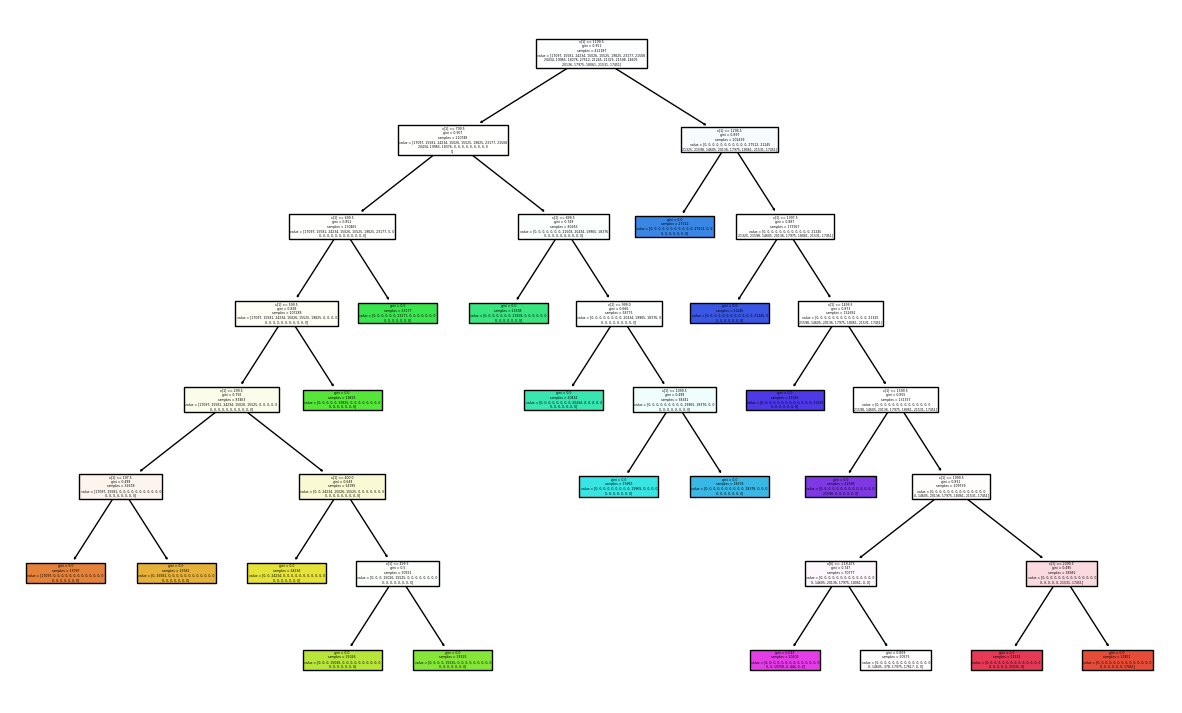

In [3]:
main()